In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing the dataset to dataframe
df = pd.read_excel(r'Sample Dataset.xlsx')

In [3]:
df.head()

,Date,Signal,Open,High,Low,Close,Adj Close
0,2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159


# 1. Review the data quality

In [4]:
# exploring the dataset shape
data = df.copy()
data.shape

(1038, 7)

In [5]:
# checking for missing values
data.isna().sum()

Date         0
Signal       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

No Missing Value could be found

<AxesSubplot:xlabel='Date'>

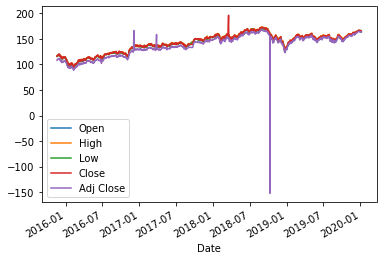

In [6]:
# plotting the data to visualize any apparent errors
data.plot(x="Date", y=["Open", "High", "Low", "Close", "Adj Close"])

Based on the above time series price plot, one obvious outlier can be seen between 2018-07 and 2019-01 the value appears to be negative for the adj return, which does not make sense.
Zoom in to the data and clean the error data

<AxesSubplot:xlabel='Date'>

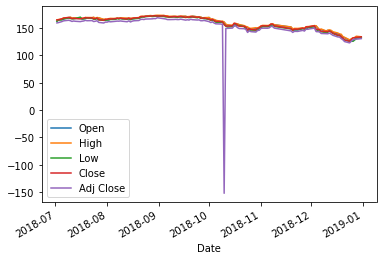

In [7]:
zoomed = data.loc[(data["Date"]>"2018-07-01")& (data["Date"]<"2019-01-01")]
zoomed.plot(x="Date", y=["Open", "High", "Low", "Close", "Adj Close"])

In [8]:
zoomed.loc[(zoomed["Date"]>"2018-10-01")& (zoomed["Date"]<"2018-11-01")]

,Date,Signal,Open,High,Low,Close,Adj Close
726,2018-10-02,19.735209,166.179993,166.529999,164.179993,164.529999,160.029877
727,2018-10-03,18.282843,165.179993,166.729996,164.509995,165.970001,161.430481
728,2018-10-04,19.720644,165.440002,165.649994,163.130005,163.639999,159.164215
729,2018-10-05,18.354276,163.750000,164.160004,160.660004,162.160004,157.724701
730,2018-10-08,20.367731,161.770004,162.399994,160.550003,161.820007,157.393982
731,2018-10-09,26.124873,161.619995,162.740005,160.979996,161.190002,156.781219
732,2018-10-10,19.719477,160.820007,160.990005,156.360001,156.559998,-152.277847
733,2018-10-11,18.794839,155.809998,157.320007,153.509995,153.570007,149.369629
734,2018-10-12,18.218555,155.559998,155.759995,151.889999,153.600006,149.398819
735,2018-10-15,18.232469,153.360001,155.289993,152.539993,154.169998,149.953232


Guessing that the error is due to misadded negative sign for Adj Close result on 2018-10-10

Correction: change Adj Close price to positive

In [9]:
data["Adj Close Clean"] = abs(data["Adj Close"])

<AxesSubplot:xlabel='Date'>

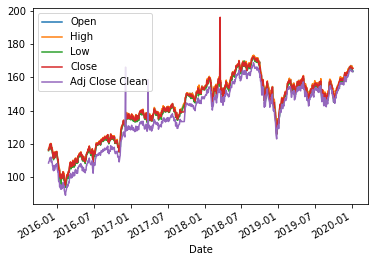

In [10]:
# Plot the new price after error correction
data.plot(x="Date", y=["Open", "High", "Low", "Close", "Adj Close Clean"])

<AxesSubplot:xlabel='Date'>

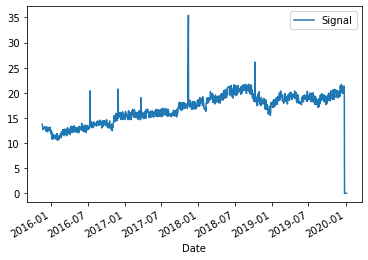

In [11]:
# Checking any errors in the signal with plot
data.plot(x="Date", y="Signal")

Apparently the final few entries of the signal are zeros. 

Correction: Delete the last 6 rows of data to eliminate the zero signals

<AxesSubplot:xlabel='Date'>

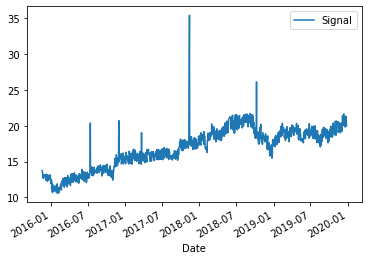

In [12]:
data.drop(data.tail(6).index,inplace=True)
data.plot(x="Date", y="Signal")

There are also a few spikes where the signal is unusually high on some particular days.

However, since no criteria has been given to determine the validity of these spikes, we cannot tell whether they are errors or just normal fluctuations in the calculated signal.

In [13]:
# Data summary after cleaning
data.describe()

,Signal,Open,High,Low,Close,Adj Close,Adj Close Clean
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,16.863667,141.710320,142.554951,140.771376,141.703198,136.181874,136.476987
std,2.827404,18.441019,18.436117,18.370474,18.461935,21.387750,19.413729
min,10.582996,94.080002,95.400002,93.639999,94.790001,-152.277847,88.820946
25%,14.804177,131.805000,132.532501,130.297501,131.607502,124.713385,125.136505
50%,17.354140,146.710007,147.924995,145.489998,146.665001,142.616989,142.631638
75%,19.032254,155.279999,156.184994,154.245002,155.207497,151.554466,151.599186
max,35.434147,172.789993,173.389999,171.949997,196.279999,168.842270,168.842270


From the summary table, we can see that the error values are gone in Signal and Adj Close Clean

   # 2. Analyzing Signal Effectiveness

Signal effectiveness will be evaluated based on the following assumptions:

a. Since there is no negative value for signal, we can assume that the forecasting is on daily price not on returns (because returns can be negative, while price is always positive)

b. The values of signal appears proportional to the price, even though the values of signal and price are not close to each other

c. We assume that the relationship between signal and price values is estimated by multiplication of a scalar factor. We call it "C"

d. We have no information about whether the signal is generated each day before or after market closes. We will assume that the signal is generated each day before market open. Therefore the signal should be used to forecast the ETF prices of the same day, not the day after. If the signal is calculated after market closes, then it can only be used to forecast the next day's prices. In this case, we need to shift the signal by one day to evaluate its forecasting effectiveness of the next day prices.

e. We do not have any information about what the signal is forecasting. Therefore I will evaluate the signal effectiveness of forecasting each price individually

In [14]:
# First we compute the correlation between the signal and each price
signal = data["Signal"]
openPrice = data["Open"]
highPrice = data["High"]
lowPrice = data["Low"]
closePrice = data["Close"]
adjClosePrice = data ["Adj Close Clean"]
r_open = signal.corr(openPrice)
r_high = signal.corr(highPrice)
r_low = signal.corr(lowPrice)
r_close = signal.corr(closePrice)
r_adjclose = signal.corr(adjClosePrice)
print('r_open: %f' % r_open)
print('r_high: %f' % r_high)
print('r_low: %f' % r_low)
print('r_close: %f' % r_close)
print('r_adjclose: %f' % r_adjclose)

r_open: 0.929529
r_high: 0.931475
r_low: 0.929225
r_close: 0.929353
r_adjclose: 0.935298


We can see that the signal is most correlated with the Adj Close Price with a correlation coefficient of 0.935. This is a high correlation coefficient, meaning that the signal and Adi Close Price are highly correlated. 

In [15]:
# Estimate the multiplication factor C for each price
from numpy import mean
C_open = mean(openPrice)/mean(signal)
C_high = mean(highPrice)/mean(signal)
C_low = mean(lowPrice)/mean(signal)
C_close = mean(closePrice)/mean(signal)
C_adjclose = mean(adjClosePrice)/mean(signal)
prediction_open = C_open*signal
prediction_high = C_high*signal
prediction_low = C_low*signal
prediction_close = C_close*signal
prediction_adjclose = C_adjclose*signal

In [16]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae_open = mean_absolute_error(openPrice, prediction_open)
mae_high = mean_absolute_error(highPrice, prediction_high)
mae_low = mean_absolute_error(lowPrice, prediction_low)
mae_close = mean_absolute_error(closePrice, prediction_close)
mae_adjclose = mean_absolute_error(adjClosePrice, prediction_adjclose)
print('mae_open: %f' % mae_open)
print('mae_high: %f' % mae_high)
print('mae_low: %f' % mae_low)
print('mae_close: %f' % mae_close)
print('mae_adjclose: %f' % mae_adjclose)

mae_open: 6.617177
mae_high: 6.612288
mae_low: 6.570234
mae_close: 6.577245
mae_adjclose: 5.307527


In [17]:
# Calculate the root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_open = mean_squared_error(openPrice, prediction_open)
mse_high = mean_squared_error(highPrice, prediction_high)
mse_low = mean_squared_error(lowPrice, prediction_low)
mse_close = mean_squared_error(closePrice, prediction_close)
mse_adjclose = mean_squared_error(adjClosePrice, prediction_adjclose)
rmse_open = sqrt(mse_open)
rmse_high = sqrt(mse_high)
rmse_low = sqrt(mse_low)
rmse_close = sqrt(mse_close)
rmse_adjclose = sqrt(mse_adjclose)
print('rmse_open: %f' % rmse_open)
print('rmse_high: %f' % rmse_high)
print('rmse_low: %f' % rmse_low)
print('rmse_close: %f' % rmse_close)
print('rmse_adjclose: %f' % rmse_adjclose)

rmse_open: 9.484330
rmse_high: 9.495719
rmse_low: 9.415806
rmse_close: 9.483618
rmse_adjclose: 8.333495


Based on MAE and RMSE, we can observe that both MAE and RMSE are lowest for forecasting the adj close price. Therefore, we can say that the signal is best at forecasting the adj close price.

Also the RMSE of 8.333 is quite good for a forecasting result, considering that the price seems quite volatile.

### Based on the above observation, we will pick the adj close price for the following volatility analysis:

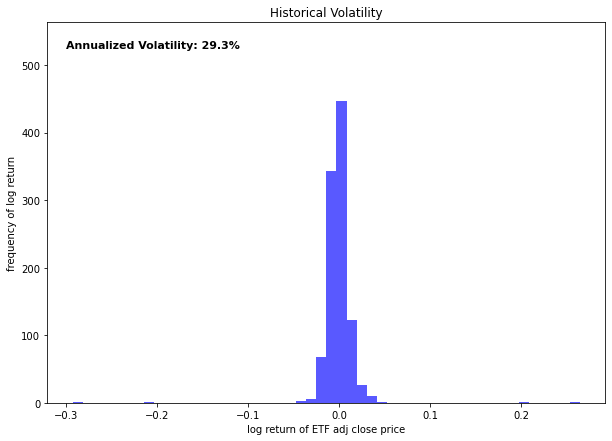

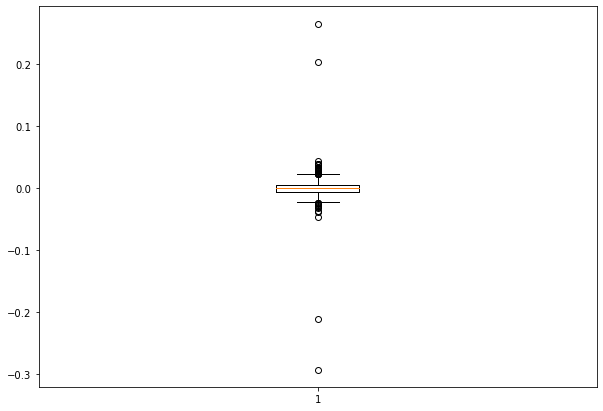

In [18]:
# Calculate the returns volitility for adj close price 
# calculate daily logarithmic return
returns = (np.log(adjClosePrice / adjClosePrice.shift(-1)))
      
# calculate daily standard deviation of returns
daily_std = np.std(returns)
  
# annualized daily standard deviation
std = daily_std * 252 ** 0.5

# Plot histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
n, bins, patches = ax.hist(
    returns.values,
    bins=50, alpha=0.65, color='blue')
 
ax.set_xlabel('log return of ETF adj close price')
ax.set_ylabel('frequency of log return')
ax.set_title('Historical Volatility')
  
# get x and y coordinate limits
x_corr = ax.get_xlim()
y_corr = ax.get_ylim()
  
# make room for text
header = y_corr[1] / 5
y_corr = (y_corr[0], y_corr[1] + header)
ax.set_ylim(y_corr[0], y_corr[1])
 
# print historical volatility on plot
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 30
y = y_corr[1] - (y_corr[1] - y_corr[0]) / 15
ax.text(x, y , 'Annualized Volatility: ' + str(np.round(std*100, 1))+'%',
    fontsize=11, fontweight='bold')
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 15
y -= (y_corr[1] - y_corr[0]) / 20

# Plot boxplot
not_nan_returns = [item for item in returns.values if not(pd.isna(item)) == True]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(not_nan_returns)
plt.show()

The distribution of Returns, especially the boxplot, shows quite a few outliers with extremely high or low daily returns. However, we cannot conclude whether they are due to errors or not.

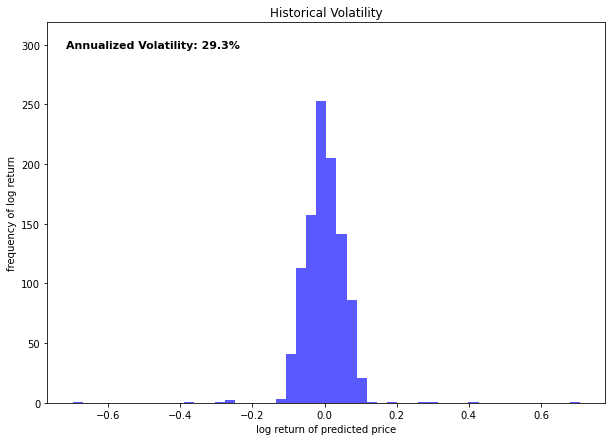

In [19]:
# Calculate the returns volitility for signal and compare with that of the adj close price
returns_signal = (np.log(prediction_adjclose / prediction_adjclose.shift(-1)))
      
# calculate daily standard deviation of returns
predicted_daily_std = np.std(returns_signal)
  
# annualized daily standard deviation
predicted_std = predicted_daily_std * 252 ** 0.5

# Plot histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
n, bins, patches = ax.hist(
    returns_signal.values,
    bins=50, alpha=0.65, color='blue')
 
ax.set_xlabel('log return of predicted price')
ax.set_ylabel('frequency of log return')
ax.set_title('Historical Volatility')
  
# get x and y coordinate limits
x_corr = ax.get_xlim()
y_corr = ax.get_ylim()
  
# make room for text
header = y_corr[1] / 5
y_corr = (y_corr[0], y_corr[1] + header)
ax.set_ylim(y_corr[0], y_corr[1])
 
# print historical volatility on plot
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 30
y = y_corr[1] - (y_corr[1] - y_corr[0]) / 15
ax.text(x, y , 'Annualized Volatility: ' + str(np.round(std*100, 1))+'%',
    fontsize=11, fontweight='bold')
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 15
y -= (y_corr[1] - y_corr[0]) / 20

The histogram for predicted returns is more disperse compared with actual returns.

<AxesSubplot:xlabel='Date'>

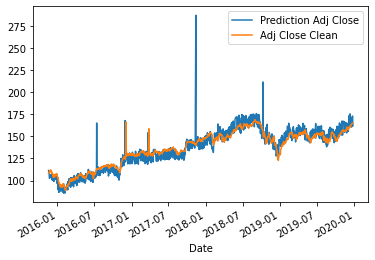

In [20]:
# Plotting the scaled signal prediction against the adj close price
data["Prediction Adj Close"] = prediction_adjclose
data.plot(x="Date", y=["Prediction Adj Close", "Adj Close Clean"])

In [21]:
# Compare the difference in volatility between Adj Close Price and the Signal Prediction
predicted_returns = (np.log(prediction_adjclose / prediction_adjclose.shift(-1)))
predicted_daily_std = np.std(predicted_returns)
predicted_std = predicted_daily_std * 252 ** 0.5
print('Actual Returns Volatility: %f' % std)
print('Predicted Signal Volatility: %f' % predicted_std)

Actual Returns Volatility: 0.292603
Predicted Signal Volatility: 0.975114


From both the plot and calculated volatilities, we can see that predicted return has much higher volability compared to the actual return. This indicates that the signal is not good at forecasting the volability of the actual price.

# 3. Observations and Next Steps

### Observations

Above analysis shows that the signal is quite good at forecasting the price, especially for the adj close price, but not good at modeling the volatility. For the next step, We further zoom in to a few time windows to find more interesting observations.

<AxesSubplot:xlabel='Date'>

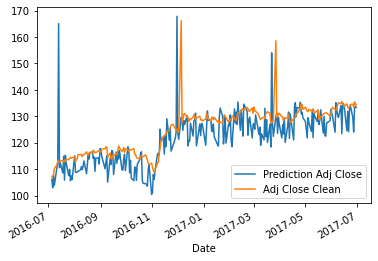

In [22]:
zoomed2 = data.loc[(data["Date"]>"2016-07-01")& (data["Date"]<"2017-07-01")]
zoomed2.plot(x="Date", y=["Prediction Adj Close", "Adj Close Clean"])

<AxesSubplot:xlabel='Date'>

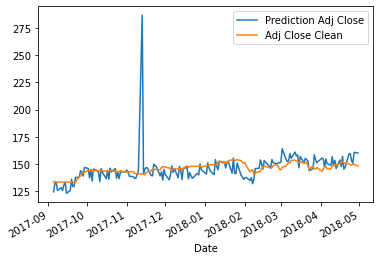

In [23]:
zoomed3 = data.loc[(data["Date"]>"2017-09-01")& (data["Date"]<"2018-05-01")]
zoomed3.plot(x="Date", y=["Prediction Adj Close", "Adj Close Clean"])

After zooming in, we can clearly observe the volatility difference. Furthermore, we can observe a leading pattern, where on some instances the predition price (blue) is ahead of the actual price (orange) by a few days! For example, we clearly see that the sudden price jumps on 12/5/16 and 3/27/17 could be forecasted by signal peaks 3 days before. However, not all the peaks in signals successfully forecasted the price jump. For example, although we observe sudden jumps in the signal on 7/13/16 and 11/13/17, no jumps can be found around these two days. These "false alarms" could cause the traders to believe that the price could have sudden jumps in a few days, and therefore could lead to terrible trading mistakes. These false alarms should be avoided if we want to make use of the signal's leading effect.

### Next Steps

The findings of high predictive power and leading effect of the signal are encouraging. The next steps would be to fine tune the model to achieve better forecasting of the volability, as well as to avoid false alarms. These could help to improve returns in trading using this forecasting signal.